Visualize time series data using a line chart, bar chart, and box plots.

The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [4]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)

In [5]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [7]:
df = df.loc[df.value.between(df.value.quantile(0.025), df.value.quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


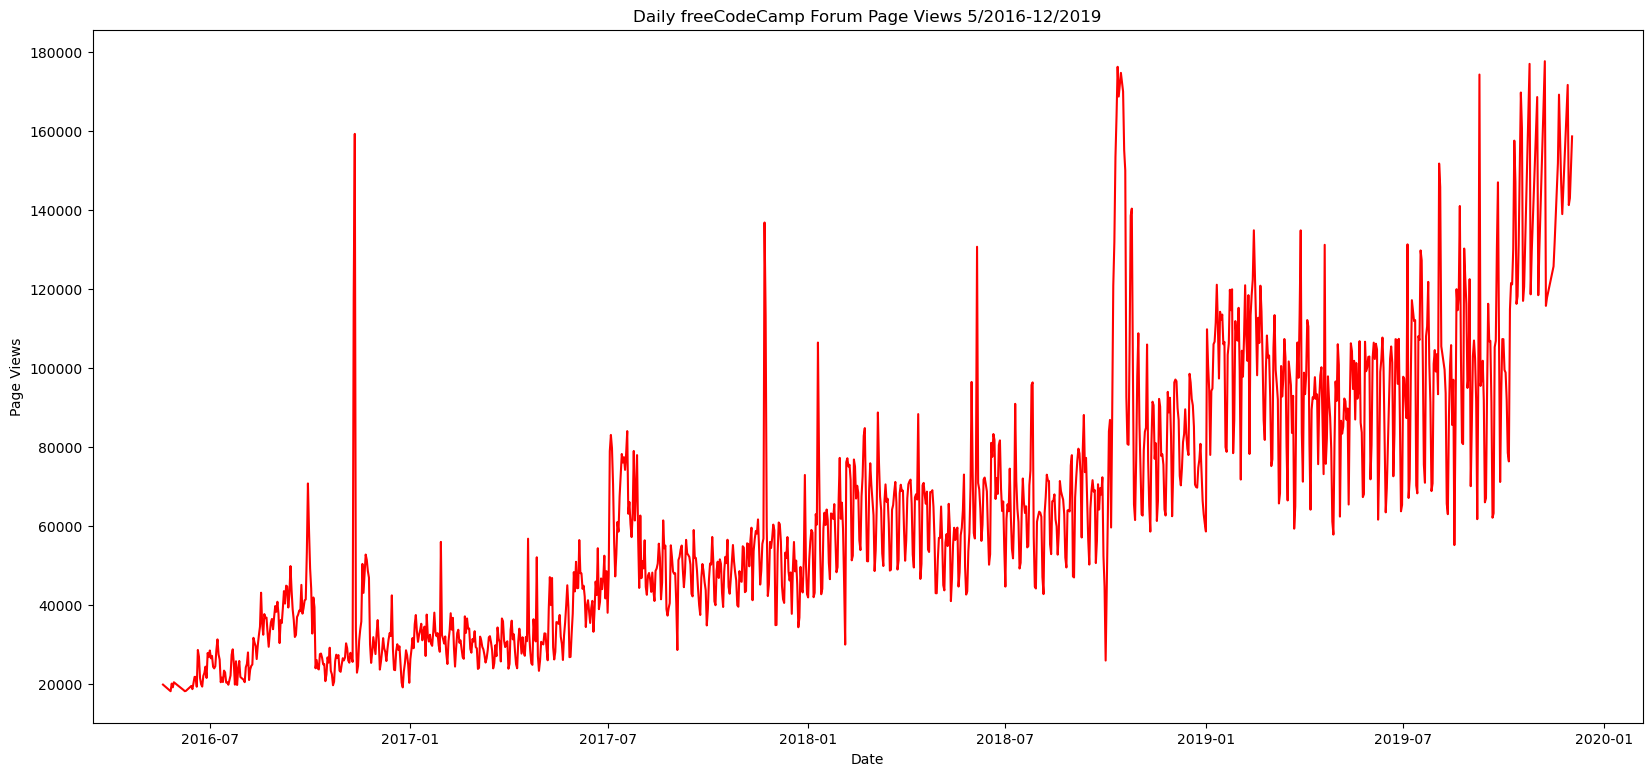

In [8]:
plt.figure(figsize=(20, 9))
plt.plot(df.copy().index, df.copy().value, c='r')

plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

It should show average daily page views for each month grouped by year. 

The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [9]:
df_bar = df.copy()

In [10]:
df_bar['Years'] = df_bar.index.year

In [11]:
df_bar['Month'] = df_bar.index.month

In [12]:
df_bar

,value,Years,Month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [13]:
df_group = df_bar.groupby(['Years', 'Month'])[['value']].mean()

In [14]:
df_group

value
Years Month               
2016  5       19432.400000
      6       21875.105263
      7       24109.678571
      8       31049.193548
      9       41476.866667
      10      27398.322581
      11      40448.633333
      12      27832.419355
2017  1       32785.161290
      2       31113.071429
      3       29369.096774
      4       30878.733333
      5       34244.290323
      6       43577.500000
      7       65806.838710
      8       47712.451613
      9       47376.800000
      10      47438.709677
      11      57701.566667
      12      48420.580645
2018  1       58580.096774
      2       65679.000000
      3       62693.774194
      4       62350.833333
      5       56562.870968
      6       70117.000000
      7       63591.064516
      8       62831.612903
      9       65941.733333
      10     111378.142857
      11      78688.333333
      12      80047.483871
2019  1      102056.516129
      2      105968.357143
      3       91214.483871
      4       89368.433333
      5       91439.903226
      6       90435.642857
      7       97236.566667
      8      102717.310345
      9       97268.833333
      10     122802.272727
      11     143166.428571
      12     150733.500000

In [15]:
df_group = df_group.unstack()

In [16]:
df_group.columns = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_group

,January,February,March,April,May,June,July,August,September,October,November,December
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


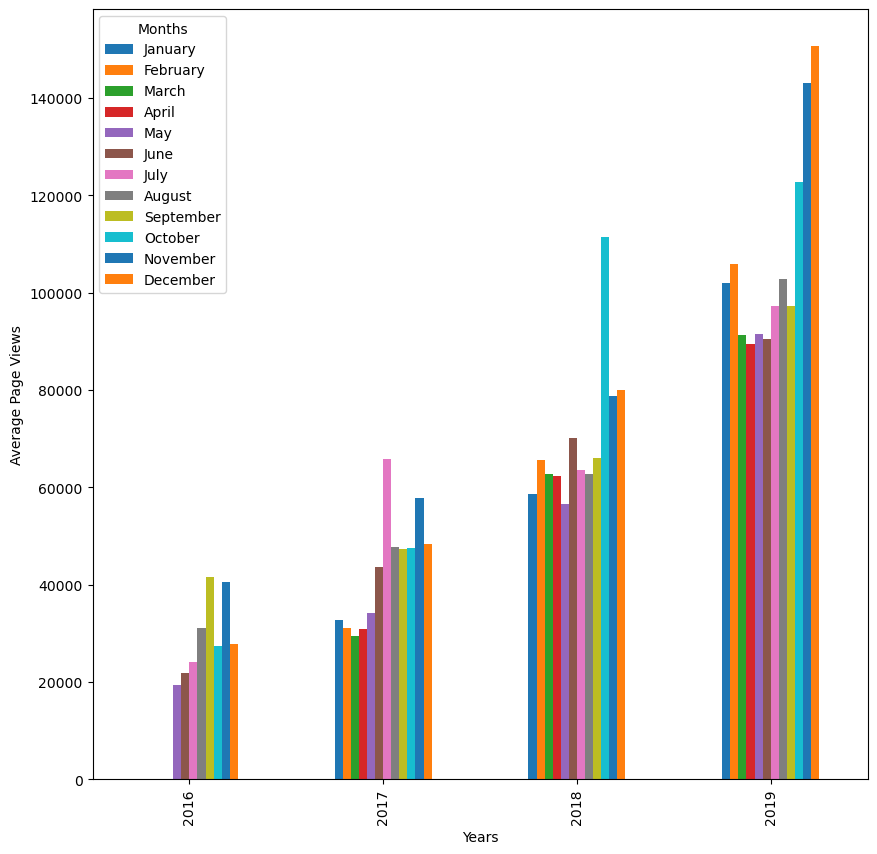

In [17]:
df_group.plot.bar(figsize=(10,10))


plt.ylabel('Average Page Views')
plt.legend(title= 'Months')
plt.show()

In [18]:
df_group = df_bar.groupby(['Years', 'Month'])[['value']].mean()

In [19]:
df_group.reset_index(inplace=True)

In [20]:
df_group.sort_values(by='Month', ignore_index= True, inplace=True)

In [21]:
df_group['Month'] = pd.to_datetime(df_group.Month, format='%m').dt.month_name()

In [22]:
df_group

,Years,Month,value
0,2019,January,102056.516129
1,2017,January,32785.161290
2,2018,January,58580.096774
3,2018,February,65679.000000
4,2019,February,105968.357143
5,2017,February,31113.071429
6,2019,March,91214.483871
7,2017,March,29369.096774
8,2018,March,62693.774194
9,2019,April,89368.433333


In [23]:
pd.to_datetime(df_group.Years, format='%Y').dt.strftime('%Y')

0     2019
1     2017
2     2018
3     2018
4     2019
5     2017
6     2019
7     2017
8     2018
9     2019
10    2018
11    2017
12    2019
13    2018
14    2016
15    2017
16    2019
17    2017
18    2018
19    2016
20    2016
21    2017
22    2018
23    2019
24    2018
25    2017
26    2019
27    2016
28    2019
29    2018
30    2017
31    2016
32    2019
33    2018
34    2017
35    2016
36    2018
37    2016
38    2019
39    2017
40    2018
41    2016
42    2017
43    2019
Name: Years, dtype: object

In [24]:
df_box = df.copy()

df_box.reset_index(inplace=True)

df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.month for d in df_box.date]
df_box.sort_values(by='month', inplace=True)

df_box['month'] = [d.strftime('%b') for d in df_box.date]


In [25]:
df_box

,date,value,year,month
210,2017-01-06,37353,2017,Jan
937,2019-01-06,94108,2019,Jan
936,2019-01-05,77897,2019,Jan
935,2019-01-04,94514,2019,Jan
934,2019-01-03,100710,2019,Jan
...,...,...,...,...
567,2017-12-29,72819,2017,Dec
566,2017-12-28,51018,2017,Dec
565,2017-12-27,43075,2017,Dec
201,2016-12-28,28424,2016,Dec


In [26]:
df_box.value

210      37353
937      94108
936      77897
935      94514
934     100710
         ...  
567      72819
566      51018
565      43075
201      28424
1237    158549
Name: value, Length: 1238, dtype: int64

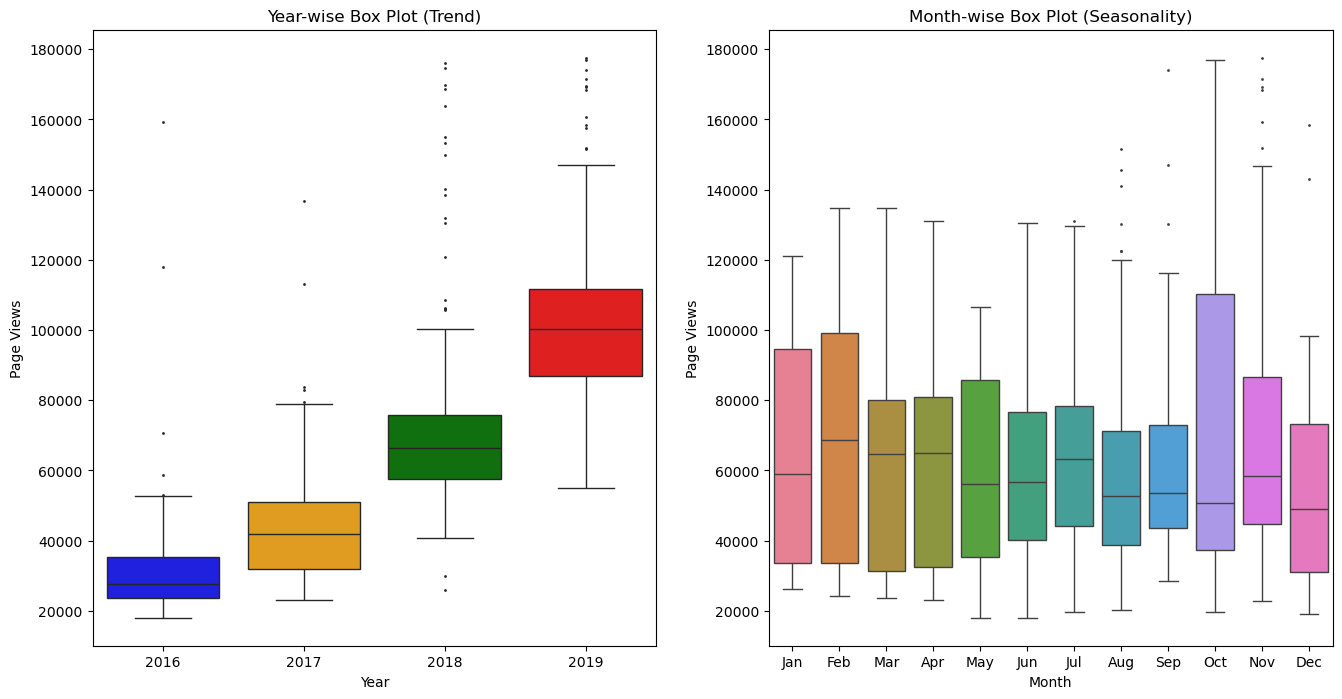

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], hue='year', palette={2016:'blue', 2017:'orange', 2018:'green', 2019:'red'}, legend=False, fliersize=1)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Year-wise Box Plot (Trend)')


sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], hue='month', palette='husl', fliersize=1)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
plt.show()